# 1. Overview 

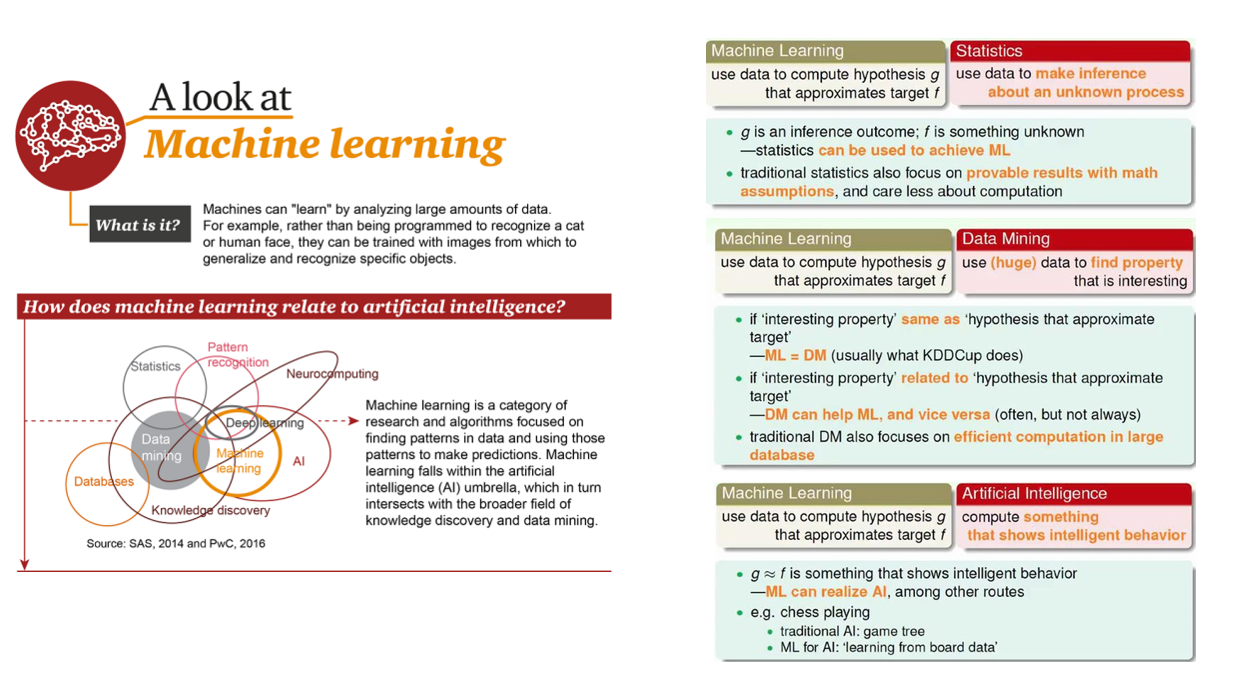

***

# 2. Using Big Data Analysis for Development 

## 2.1 Design Parameters

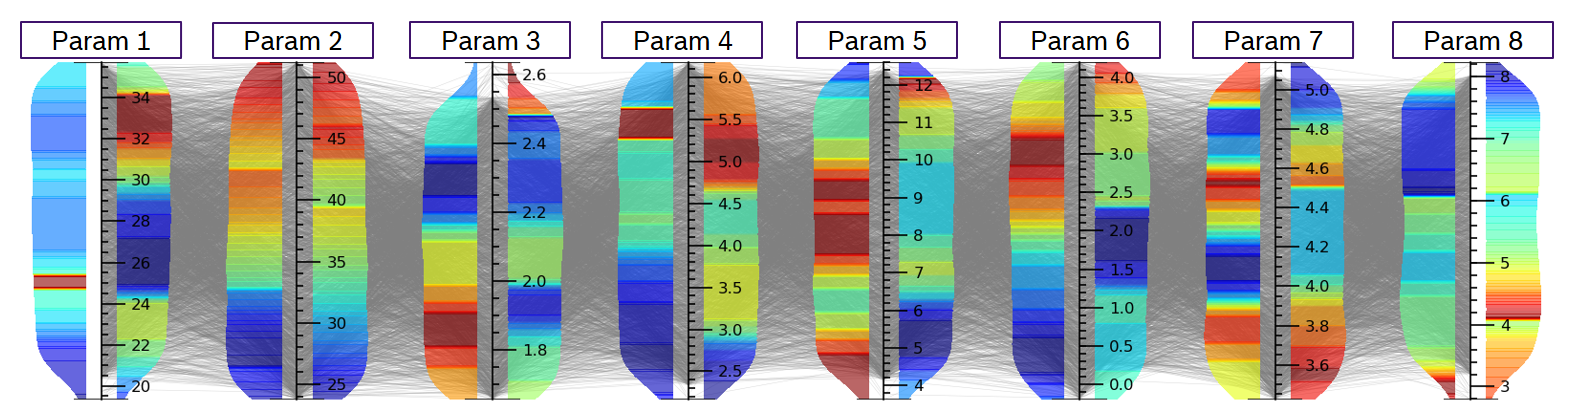

## 2.2 Targets 

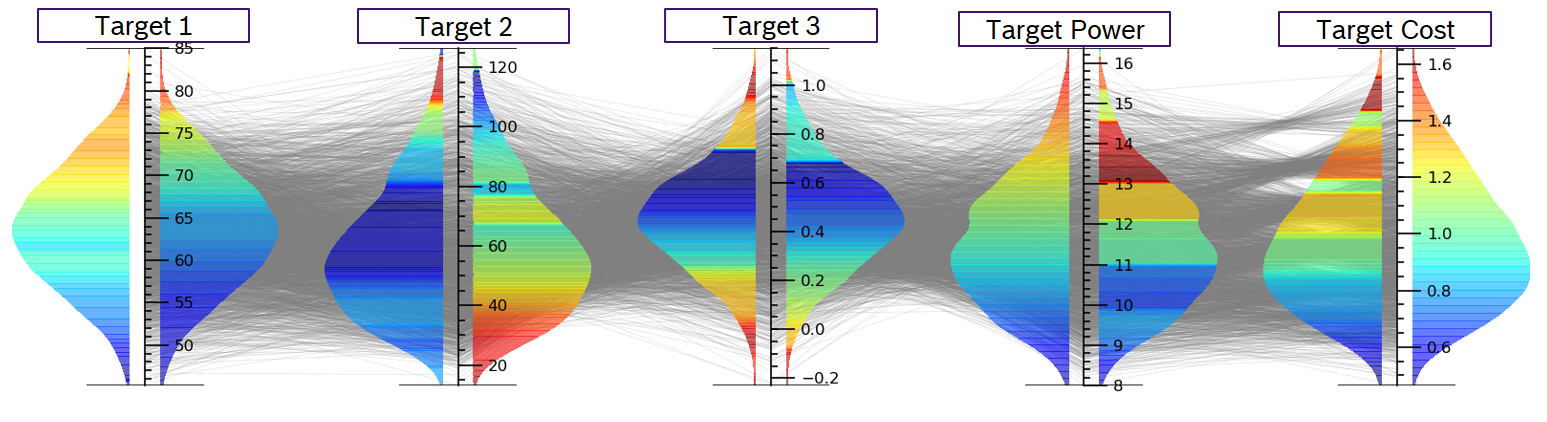

## 2.3 Pareto Optimality with Optislang

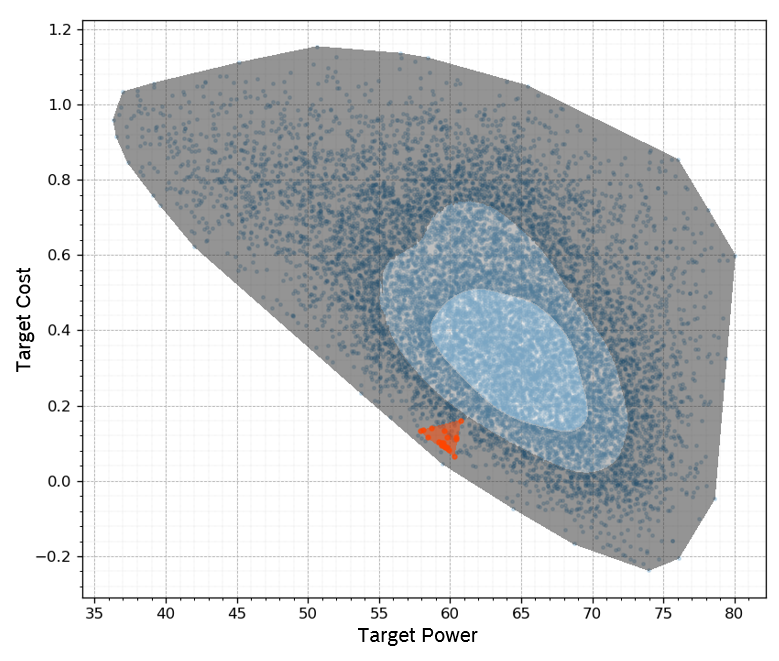

## 2.4 Machine Learning

### 2.4.1 Gaussian Process

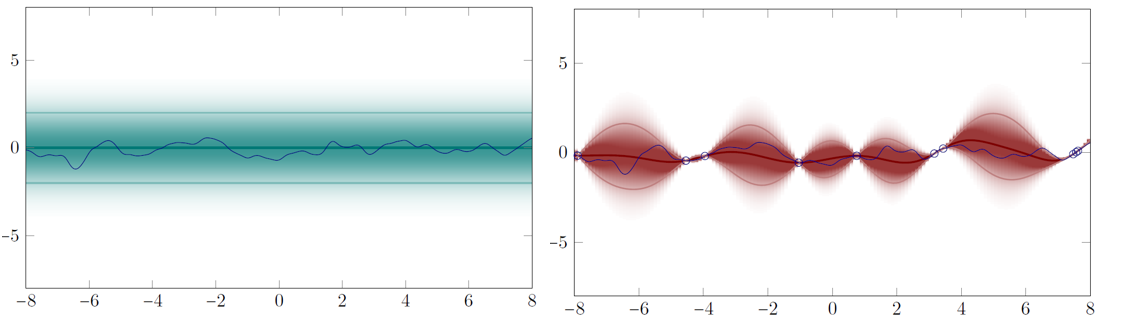

### 2.4.2 Prediction with ASCMO

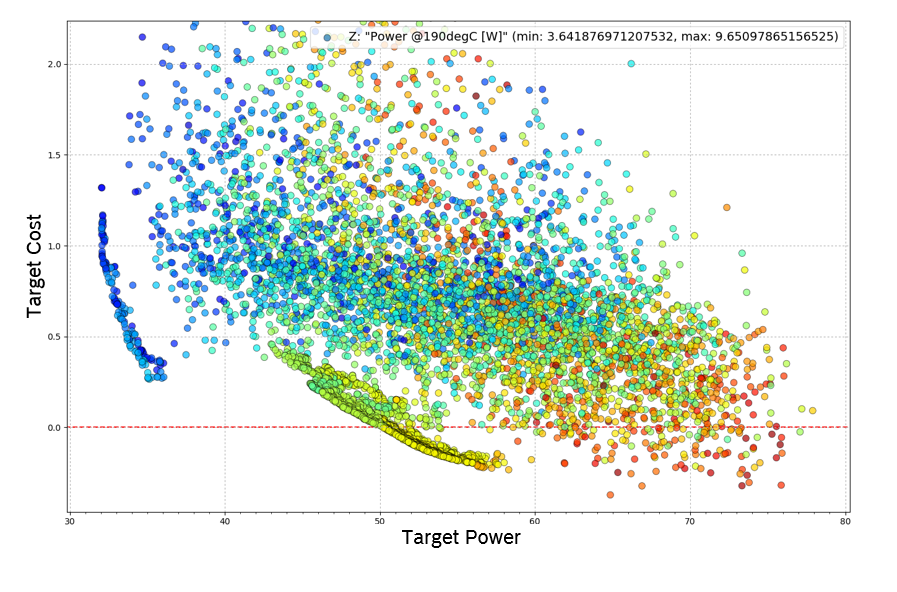

***

# 3. Anaconda

## 3.1 **[Introduction](https://zh.wikipedia.org/wiki/Anaconda)**

## 3.2 Installation

* [Bosch](http://bzo.bosch.com/bzo/de/start_page.html)
* [Home](https://www.anaconda.com/)

## 3.3 Jupyter notebook

is web-based application suitable for capturing the whole computation process: 
* developing, 
* documenting, 
* executing code, 
* communicating the results. 

In [2]:
import pandas as pd
import ML_Model as ml
import matplotlib.pyplot as plt
from imp import reload
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
reload(ml)

df_all = pd.read_csv('DAX30.DE', index_col=0, parse_dates=True)

play = widgets.Play(interval=200, value=0, min=0, max=100, step=1, disabled=False)
slider = widgets.IntSlider(readout=False, layout=dict(width='90%'), min=0, max=100, continuous_update=False)
widgets.jslink((play, 'value'), (slider, 'value'))
a = widgets.IntSlider(min=20, max=200, step=1, value=200, 
                      layout=dict(width='50%'), continuous_update=False, description='Days:')
b = widgets.Dropdown(options=df_all.columns, value=df_all.columns[0], description='Name:', disabled=False,)

c = widgets.FloatSlider(value=0.02, min=0.01, max=0.10, step=0.01, description='Tolerance.:', disabled=False,
                    continuous_update=False,orientation='horizontal', readout=True, readout_format='.2f',)
h = widgets.ColorPicker(concise=False, description='Color',value='green', disabled=False)
k = widgets.Checkbox(value=False, description='Last day price', disabled=False)
q = widgets.Checkbox(value=True, description='Display gaussians', disabled=False)

ui_high = widgets.HBox([b, a, c])
ui_middle = widgets.HBox([q, k, h])
ui_low = widgets.HBox([play, slider])
ui = widgets.VBox([ui_high, ui_middle, ui_low])

def foo(a, b, c, h, k, p, q):
    
    df_s = df_all[b].dropna()    
    ptp = np.ptp(df_s) / 2

    xdata = np.linspace(df_s.min()-ptp, df_s.max()+ptp, 500)
    df = df_s[int(p/100*(len(df_s)-a)):int(p/100*(len(df_s)-a))+a]
    df.name = 'kde'
    
    kde, gdf = ml.df_gaussian(df, tol=c)
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.minorticks_on()
    ax1.tick_params(axis='x', which='minor')
    df.plot.kde(ax=ax1)
    if q:
        ax1.fill(gdf.sum(axis=1), alpha=0.2, color='grey');
        ax1.fill(gdf, alpha=0.3)
        gdf.plot(ax=ax1, lw=1);
    if k: ax1.plot(df.tail(1), kde(df.tail(1)), 'ro', label='last day')
    ax1.grid(ls='--', which='major')
    ax1.grid(ls=':', which='minor', lw=0.5)
    ax1.set_ylim(-0.001, None)
    ax1.set_xlim(xdata.min(), xdata.max())
    ax1.set_xlabel('Price')
    
    ax1.legend(loc=9, ncol=10, facecolor='white',  bbox_to_anchor=(0.5, 1.15), fancybox=False, framealpha=1,
               title='{0}: {1} --- {2}'.format(b, df.index[0].strftime('%Y-%m-%d'), 
                                            df.index[-1].strftime('%Y-%m-%d')))    
    df.plot(ax=ax2, marker='o', color=h);
    ax2.minorticks_on()
    ax2.tick_params(axis='x', which='minor')
    ax2.grid(ls='--', which='major')
    ax2.grid(ls=':', which='minor', lw=0.5)
    ax2.set_ylabel('Price')
        
interactive_plot = widgets.interactive_output(foo, dict(a=a, b=b, c=c, h=h, k=k, p=play, q=q))
display(widgets.VBox([interactive_plot, ui]))

ModuleNotFoundError: No module named 'ML_Model'

## 3.4 Pandas

### 3.4.1 [**Introduction**](https://pandas.pydata.org/)

### 3.4.2 Example: [DAX30.DE](DAX30.DE)

1. Import data
2. Data description, box-plotting
3. Create pareto to select a share
    * Profit
    * Safety
4. Visualization (kde)
5. Cross-correlation
6. Prediction with machine learning

In [ ]:
import pandas as pd

df = pd.read_csv('DAX30.DE', index_col=0, parse_dates=True)
df


In [ ]:
df1 = df.describe()

df1

In [ ]:
df2 = (df1.loc['75%']- df1.loc['25%']) / df1.loc['25%'] * 100

df2.sort_values()

In [ ]:
df3 = (df1.loc['75%']- df1.loc['25%']) / (df1.loc['max']- df1.loc['min']) 

df3.sort_values()

In [ ]:
df4 = pd.concat([-df2, df3], axis=1)

df4

In [ ]:
x, y = df4.values.T

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x, y)
ax.grid(True)

for x0, y0, t in zip(x, y, df4.index):
    
    ax.text(x0, y0, t)

In [ ]:
df5 = df['DAI.DE']

kde, df6 = ml.df_gaussian(df5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df5.plot(ax=ax1)
df5.plot.kde(ax=ax2)

df6.plot(ax=ax2)
ax2.fill(df6, alpha=0.3)

ax2.plot(df5.tail(1), kde(df5.tail(1)), 'ro')